# **Tutorial 4: Arithmetic and Aggregation Methods**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Danika Gupta, Younkap Nina Duplex, Chi Zhang, Ohad Zivan  

**Content editors:** Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** TBD

**Our 2023 Sponsors:** NASA TOPS



###**Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).

## **Tutorial 4 Objectives**

As we just learned in the video, large-scale ocean circulation patterns are one of the main controls on global SST because surface and deep ocean currents can transport heat globally. In this tutorial, we'll use a series of tools in Xarray to interpret sea surface temperature data. 

Specifically, we’ll import monthly SST data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model. A climate model is a mathematical representation of Earth's climate system components and their interactions. Climate models are based on well-documented physical processes to simulate the transfer of energy and materials through the climate system. You'll learn more about climate models later this week and next week, but for now, we're going to be working with SST data produced from a climate model. 

To assess global variations in this SST dataset, we will practice using multiple attributes of XArray:


*   Arithmetic methods to convert temperatures from Celsius to Kelvin
*   Aggregation methods to calculate mean, median, minimum and maximum values of the data.


Finally, we'll create a map of global mean annual SST to visualize spatial variations in SST.


## Imports


In [1]:
# !pip install matplotlib.pyplot
# !pip install numpy
# !pip install xarray
# !pip install pythia_datasets
# !pip install pandas

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd

Let's open the monthly sea surface temperature (SST) data from the Community Earth System Model v2 (CESM2), which is a Global Climate Model:

In [4]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath,decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) float64 7.296e+05 7.297e+05 ... 7.351e+05 7.351e+05
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) float64 ...
    lat_bnds   (lat, d2) float64 ...
    lon_bnds   (lon, d2) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

The `tos` variable is the SST data in degrees Celsius.

Notice that our `time` variable continues numerical values that are difficult to interpret. Instead, we can assign a specific date range to our `time` variable:

In [5]:
new_time = pd.date_range(start='2000-01-15', end='2014-12-15', periods=180)

In [6]:
ds = ds.assign(time=new_time)

## Arithmetic Operations

Arithmetic operations with a single DataArray automatically apply over all array values (like NumPy). This process is called vectorization.  Let's convert the temperature from degrees Celsius to Kelvin:

In [7]:
ds.tos + 273.15

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.3552 , 271.3553 , 271.3554 , ..., 271.35495, 271.355  ,
         271.3551 ],
        [271.36005, 271.36014, 271.36023, ..., 271.35986, 271.35992,
         271.36   ],
        [271.36447, 271.36453, 271.3646 , ..., 271.3643 , 271.36435,
         271.3644 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [271.40677, 271.40674, 271.4067 , ..., 271.40695, 271.4069 ,
         271.40683],
        [271.41296, 271.41293, 271.41293, ..., 271.41306, 271.413  ,
         271.41296],
        [271.41772, 271.41772, 271.41772, ..., 271.41766, 271.4177 ,
         271.4177 ]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [271.39386, 271.39383, 271.3938 , ..., 271.39407, 271.394  ,
         271.39392],
        [271.39935, 271.39932, 271.39932, ..., 271.39948, 271.39944,
         271.39938],
        [271.40372, 271.40372, 271.40375, ..., 271.4037 , 271.4037 ,
         271.40372]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5


You may notice that there are a lot of NaN values in the DataArry for `tos`. NaN isn’t a bad thing and it just means there isn’t data for those coordinates. In this case, there's not `tos` data for areas with land since this dataset only contains SST values.


Just to practice another arithmetic operation, lets's square all values in `tos`:

In [8]:
ds.tos**2

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.2213385, 3.2209656, 3.220537 , ..., 3.2221622, 3.221913 ,
         3.2216525],
        [3.203904 , 3.203617 , 3.2032912, ..., 3.2045207, 3.2043478,
         3.2041442],
        [3.1881146, 3.1879027, 3.1876712, ..., 3.188714 , 3.1885312,
         3.1883302]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [3.0388296, 3.0389647, 3.0390673, ..., 3.038165 , 3.0383828,
         3.0386322],
        [3.0173173, 3.0173445, 3.0173297, ..., 3.0169601, 3.0171173,
         3.0172386],
        [3.000791 , 3.0007784, 3.0007539, ..., 3.000933 , 3.000896 ,
         3.0008452]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [3.0839543, 3.0841148, 3.0842566, ..., 3.0832636, 3.0834875,
         3.0837412],
        [3.064733 , 3.0648024, 3.0648358, ..., 3.0642793, 3.0644639,
         3.0646174],
        [3.0494578, 3.0494475, 3.0494263, ..., 3.049596 , 3.0495603,
         3.0495107]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

## Aggregation Methods 

A very common step during data analysis is to summarize the data in question by computing aggregations like `sum()`, `mean()`, `median()`, `min()`, `max()` in which reduced data provide insight into the nature of large dataset. For example, in the introductory video for this tutorial, we saw maps of the mean annual sea surface temperature and sea surface density. 


The following table summarizes some other built-in xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |


Let's explore some of these aggregation methods.


Compute the temporal min:

In [ ]:
ds.tos.min(dim='time')

Compute the spatial sum:

In [ ]:
ds.tos.sum(dim=['lat', 'lon'])

Compute the temporal median:

In [ ]:
ds.tos.median(dim='time')

Compute the mean SST:

In [9]:
ds.tos.mean()

<xarray.DataArray 'tos' ()>
array(14.250171, dtype=float32)

Because we specified no `dim` argument, the function was applied over all dimensions, computing the mean of every element of `tos` across time and space. It is possible to specify a dimension along which to compute an aggregation. For example, to calculate the mean in time for all locations, specify the time dimension as the dimension along which the mean should be calculated:

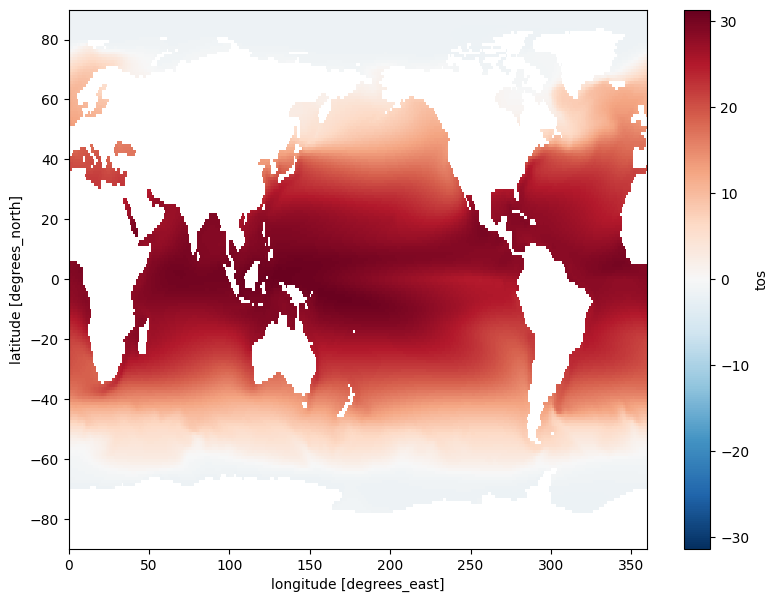

In [10]:
ds.tos.mean(dim='time').plot(size=7);

Compute the temporal min:

In [11]:
ds.tos.min(dim=['time'])

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.8083605, -1.8083031, -1.8082187, ..., -1.8083988, -1.8083944,
        -1.8083915],
       [-1.8025414, -1.8024837, -1.8024155, ..., -1.8026428, -1.8026177,
        -1.8025846],
       [-1.7984415, -1.7983989, -1.7983514, ..., -1.7985678, -1.7985296,
        -1.7984871]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

Compute the spatial sum:

In [12]:
ds.tos.sum(dim=['lat', 'lon'])

<xarray.DataArray 'tos' (time: 180)>
array([603767.  , 607702.5 , 603976.5 , 599373.56, 595119.94, 595716.75,
       598177.3 , 600670.6 , 597825.56, 591869.  , 590507.7 , 597189.2 ,
       605954.06, 609151.  , 606868.9 , 602329.9 , 599465.75, 601205.5 ,
       605144.4 , 608588.5 , 604046.9 , 598927.75, 597519.75, 603876.9 ,
       612424.44, 615765.2 , 612615.44, 606310.6 , 602034.4 , 600784.9 ,
       602013.5 , 603142.2 , 598850.9 , 591917.44, 589234.56, 596162.5 ,
       602942.06, 607196.9 , 604928.2 , 601735.6 , 599011.8 , 599490.9 ,
       600801.44, 602786.94, 598867.2 , 594081.8 , 593736.25, 598995.6 ,
       607285.25, 611901.06, 609562.75, 603527.3 , 600215.4 , 601372.6 ,
       604144.5 , 605376.75, 601256.2 , 595245.2 , 594002.06, 600490.4 ,
       611878.6 , 616563.  , 613050.8 , 605734.  , 600808.75, 600898.06,
       603930.56, 605644.7 , 599917.5 , 592048.06, 590082.8 , 596950.7 ,
       607701.94, 610844.7 , 609509.6 , 603380.94, 599838.1 , 600334.25,
       604386.6 , 607848.1 , 602155.2 , 594949.06, 593815.06, 598365.3 ,
       608730.8 , 612056.5 , 609922.5 , 603077.1 , 600134.1 , 602821.2 ,
       606152.75, 610257.8 , 604685.8 , 596858.  , 592894.8 , 599944.9 ,
       609764.44, 614610.75, 611434.75, 605606.4 , 603790.94, 605750.2 ,
       609250.06, 612935.7 , 609645.06, 601706.4 , 598896.5 , 605349.75,
       614671.8 , 618686.7 , 615895.2 , 609438.2 , 605399.56, 606126.75,
       607942.3 , 609680.4 , 604814.25, 595841.94, 591908.44, 595638.7 ,
       604798.94, 611327.1 , 609765.7 , 603727.56, 600970.  , 602514.  ,
       606303.7 , 609225.25, 603724.3 , 595944.8 , 594477.4 , 597807.4 ,
       607379.06, 611808.56, 610112.94, 607196.3 , 604733.06, 605488.25,
       610048.3 , 612655.75, 608906.25, 602349.7 , 601754.2 , 609220.4 ,
       619367.1 , 623783.2 , 619949.7 , 613369.06, 610190.8 , 611091.2 ,
       614213.44, 615665.06, 611722.2 , 606259.56, 605970.2 , 611463.3 ,
       619794.6 , 626036.5 , 623085.44, 616295.9 , 611886.3 , 611881.9 ,
       614420.75, 616853.56, 610375.44, 603471.5 , 602108.25, 608094.3 ,
       617450.7 , 623508.7 , 619830.2 , 612033.3 , 608737.2 , 610105.25,
       613692.7 , 616360.44, 611735.4 , 606512.7 , 604249.44, 608777.44],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15

Compute the temporal median:

In [13]:
ds.tos.median(dim='time')

<xarray.DataArray 'tos' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7648907, -1.7648032, -1.7647004, ..., -1.7650614, -1.7650102,
        -1.7649589],
       [-1.7590305, -1.7589546, -1.7588665, ..., -1.7591925, -1.7591486,
        -1.759095 ],
       [-1.7536805, -1.753602 , -1.7535168, ..., -1.753901 , -1.753833 ,
        -1.7537591]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

The following table summarizes some other built-in xarray aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``prod()``               | Compute product of elements            |
| ``sum()``                | Compute sum of elements                |
| ``argmin()``, ``argmax()``| Find index of minimum and maximum value |

## Climate Connection

Observe the spatial patterns in SST and consider the following in the context of the components of the ocean climate system we learned about in the video:

Question 1: Can you identify any regions of upwelling?
<details>
<summary>Click here to see the answer</summary>
    
>_Answer_: Upwelling is a process in which deep, cold water rises toward the surface. This can be identified in a sea surface temperature (SST) map as areas where the SST is colder than the surrounding waters. Upwelling zones are commonly found along the west coasts of continents.
</details>

Question 2: Why is there an area of cold water in the North Atlantic?
<details>
<summary>Click here to see the answer</summary>
    
>_Answer_: The area of cold water in the North Atlantic is likely associated with the North Atlantic Drift, a powerful warm western boundary current within the Atlantic Ocean that extends the Gulf Stream northeastward. However, as it moves north, the warmer waters cool due to the lower ambient temperatures and heat loss to the atmosphere. Also, the water becomes denser and sinks, a process known as "downwelling". This circulation is part of the larger thermohaline circulation or Atlantic Meridional Overturning Circulation (AMOC), a major current system in the Atlantic that redistributes heat globally and plays a significant role in climate regulation.
</details>





## Summary

In this tutorial, we have explored the use of the CESM2 and have imported and analyzed monthly sea surface temperature (SST, or tos) data. We used arithmetic methods to convert SST from Celsius to Kelvin, and aggregation methods to compute the mean, median, minimum, and maximum values of the data. To conclude, we visualized the spatial variations in SST by generating a map of the global mean annual SST. This tutorial has provided us with valuable insights into global variations in SST and how to manipulate and analyze such data using XArray.
